In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pareto
import random
import functions as f

In [ ]:
#GLOBAL CONSTANTS
clv_thoery = 10 
size= 10000 # size of each sample
n = 10000 # number of samples
DureeObs = 12*2 # duration of observation

## Exponential (not censored)

**CLV computing**

In [715]:
# CONSTANT
censored = 0
# Monte Carlo simulation
clv_exp_nc, Y_n = f.monte_carlo(clv_thoery, size, n, censored, f.exp_nc_clv_estimator, f.generate_exponential_perfect)

CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 10 
 	 CLV real = 10.000686  
 	 Standard deviation CLV= 0.099757


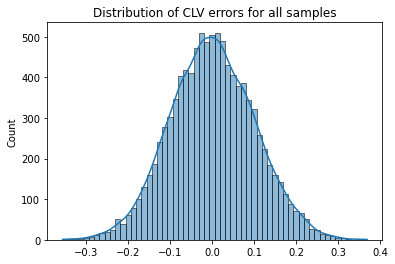

In [716]:
f.print_conv_plot_distribution(size, n ,clv_thoery, clv_exp_nc)

For not censored data, the exponential based clv estimator has a pretty low standard deviation of 0.09

**confidence interval**

In [717]:
lower_exp_nc, upper_exp_nc = f.bootstrap_intervals(Y_n,censored,np.mean)

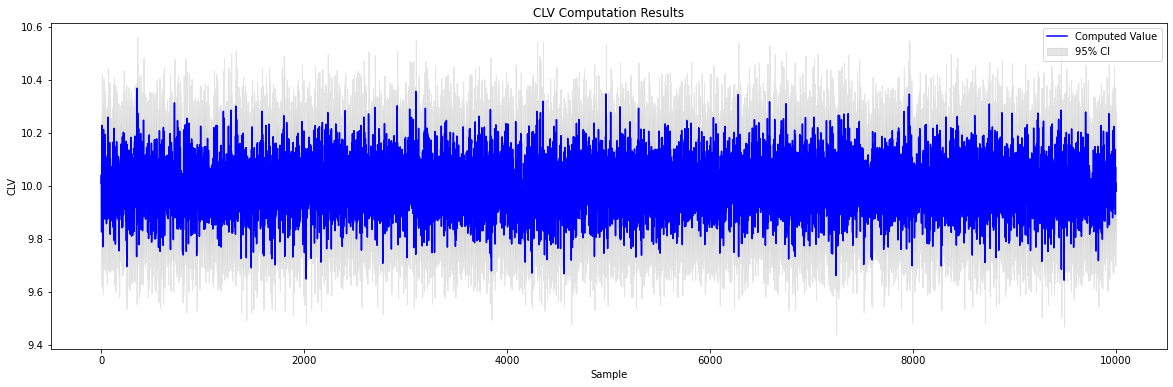

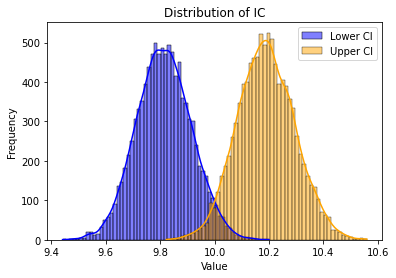

CONFIDENCE LEVEL: 94.06%


In [718]:
# plot confidence interval
f.CI_multiplot(clv_exp_nc, lower_exp_nc, upper_exp_nc)

In [795]:
std_lower_exp_nc = np.std(lower_exp_nc)
std_upper_exp_nc = np.std(upper_exp_nc)

## Exponential (censored)

**CLV computing**

In [768]:
# CONSTANT
censored = 1
# Monte Carlo simulation
clv_exp_nc, Y_n =f. monte_carlo(clv_thoery, size, n, censored, f.exp_c_clv_estimator, f.generate_exponential)

CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 1.50 
 	 CLV real = 10.001428  
 	 Standard deviation CLV= 0.126088


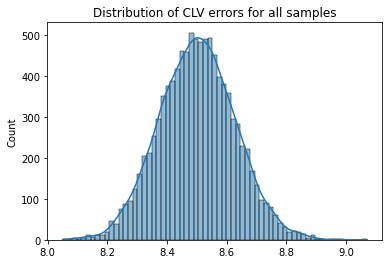

In [837]:
f.print_conv_plot_distribution(size, n ,clv_thoery, clv_exp_c)

The error is still normally distributed and the standart deviation is higher. 
As censored data are normally distributed, they have no impact on the error distribution. Censored data increase the std of the error by 40% comparing to non censored data.

**Theoretical confidence intervals**

In [776]:
lower_exp_c = []
upper_exp_c = []
for i in range(n):
    lower_exp_c.append(f.CI_exp_c_clv(1.96, Y_n[i][0], Y_n[i][1])[0])
    upper_exp_c.append(f.CI_exp_c_clv(1.96, Y_n[i][0], Y_n[i][1])[1])

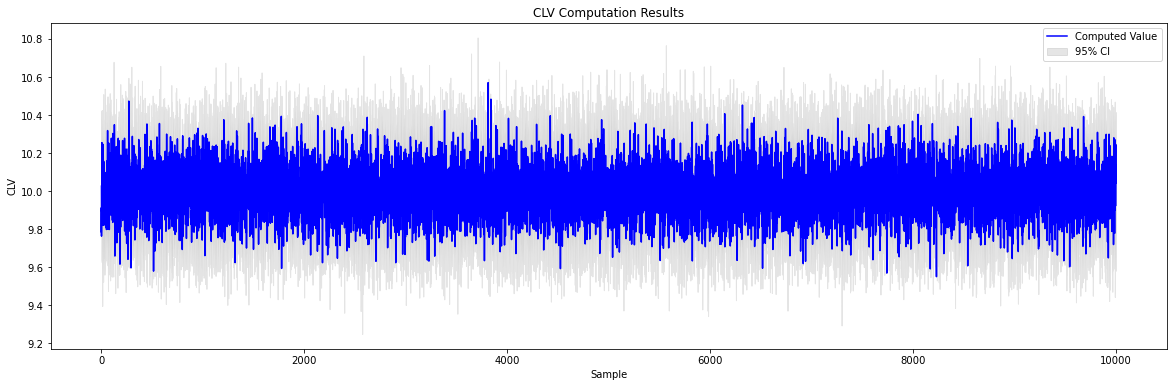

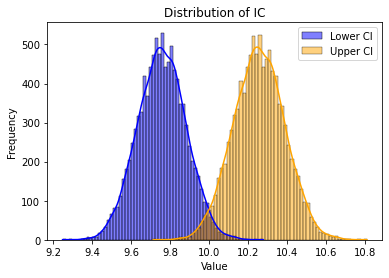

CONFIDENCE LEVEL: 95.21%


In [777]:
# plot confidence interval
f.CI_multiplot(clv_exp_c, lower_exp_c, upper_exp_c)

In [796]:
std_lower_exp_c = np.std(lower_exp_c)
std_upper_exp_c = np.std(upper_exp_c)

**Confidence interval standard deviation comparison (censored vs not censored)**

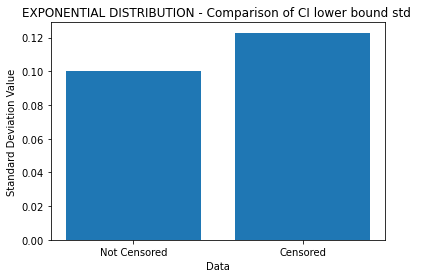

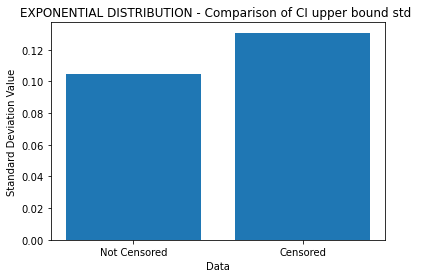

In [820]:
f.plot_bar_std(std_lower_exp_nc, std_lower_exp_c, 'EXPONENTIAL DISTRIBUTION - Comparison of CI lower bound std ')
f.plot_bar_std(std_upper_exp_nc, std_upper_exp_c, 'EXPONENTIAL DISTRIBUTION - Comparison of CI upper bound std ')

Similar to the geometric distribution, the addition of censored data can result in larger confidence intervals for exponential distributions. As seen in the results for exponential distributions, incorporating censored data leads a higher standard deviation and then, wider confidence intervals as a sign of higher degree of uncertainty in the predictions.

**Bootstrap confidence intervals**

Although the confidence intervals have been calculated using the theoretical formula, the purpose of this section is to verify the results using the bootstrap method.

In [723]:
lower_exp_c2, upper_exp_c2 = f.bootstrap_intervals(Y_n,censored,f.exp_c_clv_estimator)

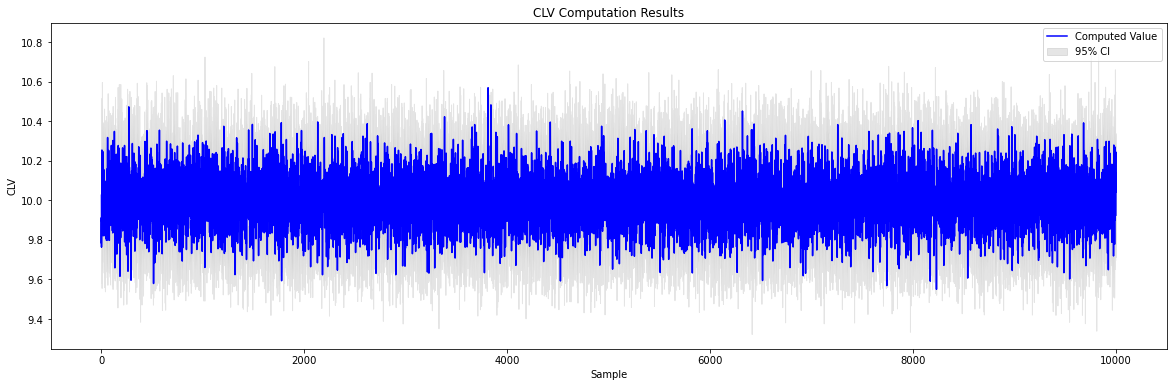

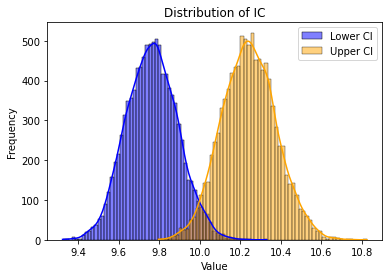

CONFIDENCE LEVEL: 94.09%


In [724]:
# plot confidence interval
f.CI_multiplot(clv_exp_c, lower_exp_c2, upper_exp_c2)

The confidence level derived from the bootstrap method is approximately 98% consistent with the one obtained with theoretical approach.